## <center>**DiabRisk - Analyse et Prédiction du Risque de Diabète**</center>

Un projet d’intelligence artificielle visant à analyser, segmenter et prédire le risque de diabète à partir de données biomédicales de patients.

#### **1. Importation de DataSet:**

En ``Pandas``, on utilise ``read_csv`` pour importer le fichier csv de notre Dataset.

Le chemin du fichier est le suivant : ``DiabRisk/data/raw/data.csv``

In [ ]:
import pandas as pd

data = pd.read_csv('../data/raw/data.csv')

<br>

#### **2. Exploration du DataSet:**

##### **2.1. Les Dimensions :**

En ``Pandas``, pour afficher les dimensions d'une Dataset on utilise ``shape``.

In [ ]:
print(data.shape)

Le résultat donnée par la fonction ``shape`` est que notre DataSet est composée de :

- ``768`` lignes.

- ``9`` colonnes.

##### **2.2. Types des Columns :**

En ``Pandas``, pour afficher les colonnes d'une Dataset avec leurs types on utilise ``dtypes``.

In [ ]:
print(data.dtypes)

Notre DataSet est composé des colonnes suivants :

| Colonne                       | Type              | 
| ----------------------------- | ------------------|
| Unnamed (Index)               | Numeric (int)     |
| Pregnancies                   | Numeric (int)     |
| Glucose                       | Numeric (int)     |
| BloodPressure                 | Numeric (int)     |
| SkinThickness                 | Numeric (int)     |
| Insulin                       | Numeric (int)     |
| BMI                           | Numeric (float)   |
| DiabetesPedigreeFunction      | Numeric (float)   |
| Age                           | Numeric (int)     |


##### **2.3. Aperçu :**

En Pandas, pour avoir une aperçu de notre DataSet , on utilise :

- ``data.head()`` pour afficher les premières lignes d’un DataFrame.

- ``data.tail()`` pour afficher les dernières lignes d’un DataFrame.

In [8]:
data.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  
0  33.6                     0.627   50  
1  26.6                     0.351   31  
2  23.3                     0.672   32  
3  28.1                     0.167   21  
4  43.1                     2.288   33

In [9]:
data.tail()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeFunction  Age  
763  32.9                     0.171   63  
764  36.8                     0.340   27  
765  26.2                     0.245   30  
766  30.1                     0.349   47  
767  30.4                     0.315   23

<br>

#### **3. Identification des Valeurs Manquantes ou Doublantes :**

##### **3.1. Les Valeurs Manquantes :**

Pour vérifier s’il y a des valeurs manquantes dans tout le DataSet, on utilise ``isnull()`` :

In [ ]:
data.isnull().sum()

- ``isnull().sum()`` affiche le nombre des Valeurs Manquantes pour chaque Colonne de Notre DataSet.

- Le résultat est la suivante :

| Colonne                       | Valeurs Manquantes | 
| ----------------------------- | ------------------ |
| Unnamed (Index)               | 0                  |
| Pregnancies                   | 0                  |
| Glucose                       | 0                  |
| BloodPressure                 | 0                  |
| SkinThickness                 | 0                  |
| Insulin                       | 0                  |
| BMI                           | 0                  |
| DiabetesPedigreeFunction      | 0                  |
| Age                           | 0                  |

<br>

D'où, l'_**Abscence des Valeurs Manquantes**_ dans notre DataSet.


##### **3.2. Les Doublons :**

Pour vérifier si des lignes sont complètement identiques, on utilise ``duplicated()`` :

In [ ]:
data.duplicated().sum()

- ``data.duplicated().sum()`` compte le nombre de valeurs manquantes par colonne.

<br>

Le résultat donné exprime _**l'Abscence des Doublons**_ dans notre DataSet.

<br>

#### **4. Analyse de la Distribution Statistique des Variables :**

Pour comprendre comment les valeurs d’une variable de notre DataSet sont réparties, leur <code>concentration</code>, leur <code>étendue</code> 
et leur <code>forme générale</code>, il faut analyse de la distribution de cette variable.

##### **4.1. Les Statistiques :**

En Pandas, on utilise souvent la méthode ``data.describe()`` pour obtenir rapidement ces statistiques sur les colonnes numériques.

In [17]:
data.describe()

Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min      0.000000    0.000000                  0.078000   21.000000  
25%      0.000000   27.300000                  0.243750   24.000000  
50%     30.500000   32.000000                  0.372500   29.000000  
75%    127.250000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

- **Analyse avant Visualisation :**

| Colonne                       | Analyse                                                                                                      | 
| ----------------------------- | ------------------------------------------------------------------------------------------------------------ |
| Pregnancies                   | - Min = 0 : certaines patientes n’ont jamais été enceintes.<br>- Max = 17 : extrême inhabituel(possiblement un outlier). <br>- **Remarque :** la variable est asymétrique à droite (quelques patientes avec un très grand nombre de grossesses).|
| Glucose                       | - Moyenne : ~121, écart-type **élevé** (~32). <br>- Min = 0 : biologiquement impossible ce qui reflète la présence des valeurs manquantes mal encodées (probablement 0 = missing-NaN).<br>- **Remarque** :  La présence des valeurs aberrantes.|
| BloodPressure                 | - Moyenne= ~69 , Ecart-type = ~19.3 : Valeurs Assez Variables . <br>- Min = 0 : impossible physiologiquement ce qui reflète la présence des valeurs manquante.|
| SkinThickness                 | - Moyenne = ~20.5, écart-type = 15,9 : grande variabilité.<br>- Min = 0 : incohérent (épaisseur ne peut pas être nulle).|
| Insulin                       | - Moyenne : ~79.8, écart-type **très élevé** (~115) ce qui reflète qu'on aura une très forte dispersion.<br>- Min = 0 : incohérent (manquant).<br>- Max = 846 : extrême, probablement un outlier.|
| BMI                           | - Moyenne = ~31,9 : typique d’un surpoids / obésité légère.<br>Écart-type = ~7,9 : assez large.<br>- Min = 0 : Impossible / Présence des valeurs manquantes.|
| DiabetesPedigreeFunction      | - Moyenne = 0,47 avec un écart-type = 0,33. <br>- Min = 0,078, Max = 2,42 : valeurs plausibles, pas de zéro anormal.<br>- Valeurs Extrêmes Possibles.|
| Age                           | - Moyenne : ~33 ans , écart-type = ~11,7.<br>- Min = 21, Max = 81 : étendue cohérente.<br>- **Remarque :** Il y'a plus de jeunes patientes que de très âgées.|

<br>

En **_gros_**, on peut résumer cette préanalyse en ces 3 points :

- Présence des Colonnes avec des zéros anormaux : 
    - ``Glucose``, ``BloodPressure``, ``SkinThickness``, ``Insulin``, ``BMI``.
    - Ces zéros représentent des valeurs manquantes et doivent être imputés.

- Présence probable d’outliers : ``Insulin``, ``Pregnancies``, ``DiabetesPedigreeFunction``

- Variables très dispersées : ``Insulin``, ``Glucose``, ``BMI``

<br>

##### **4.2. La Distribution des Variables avec Histogrammes :**


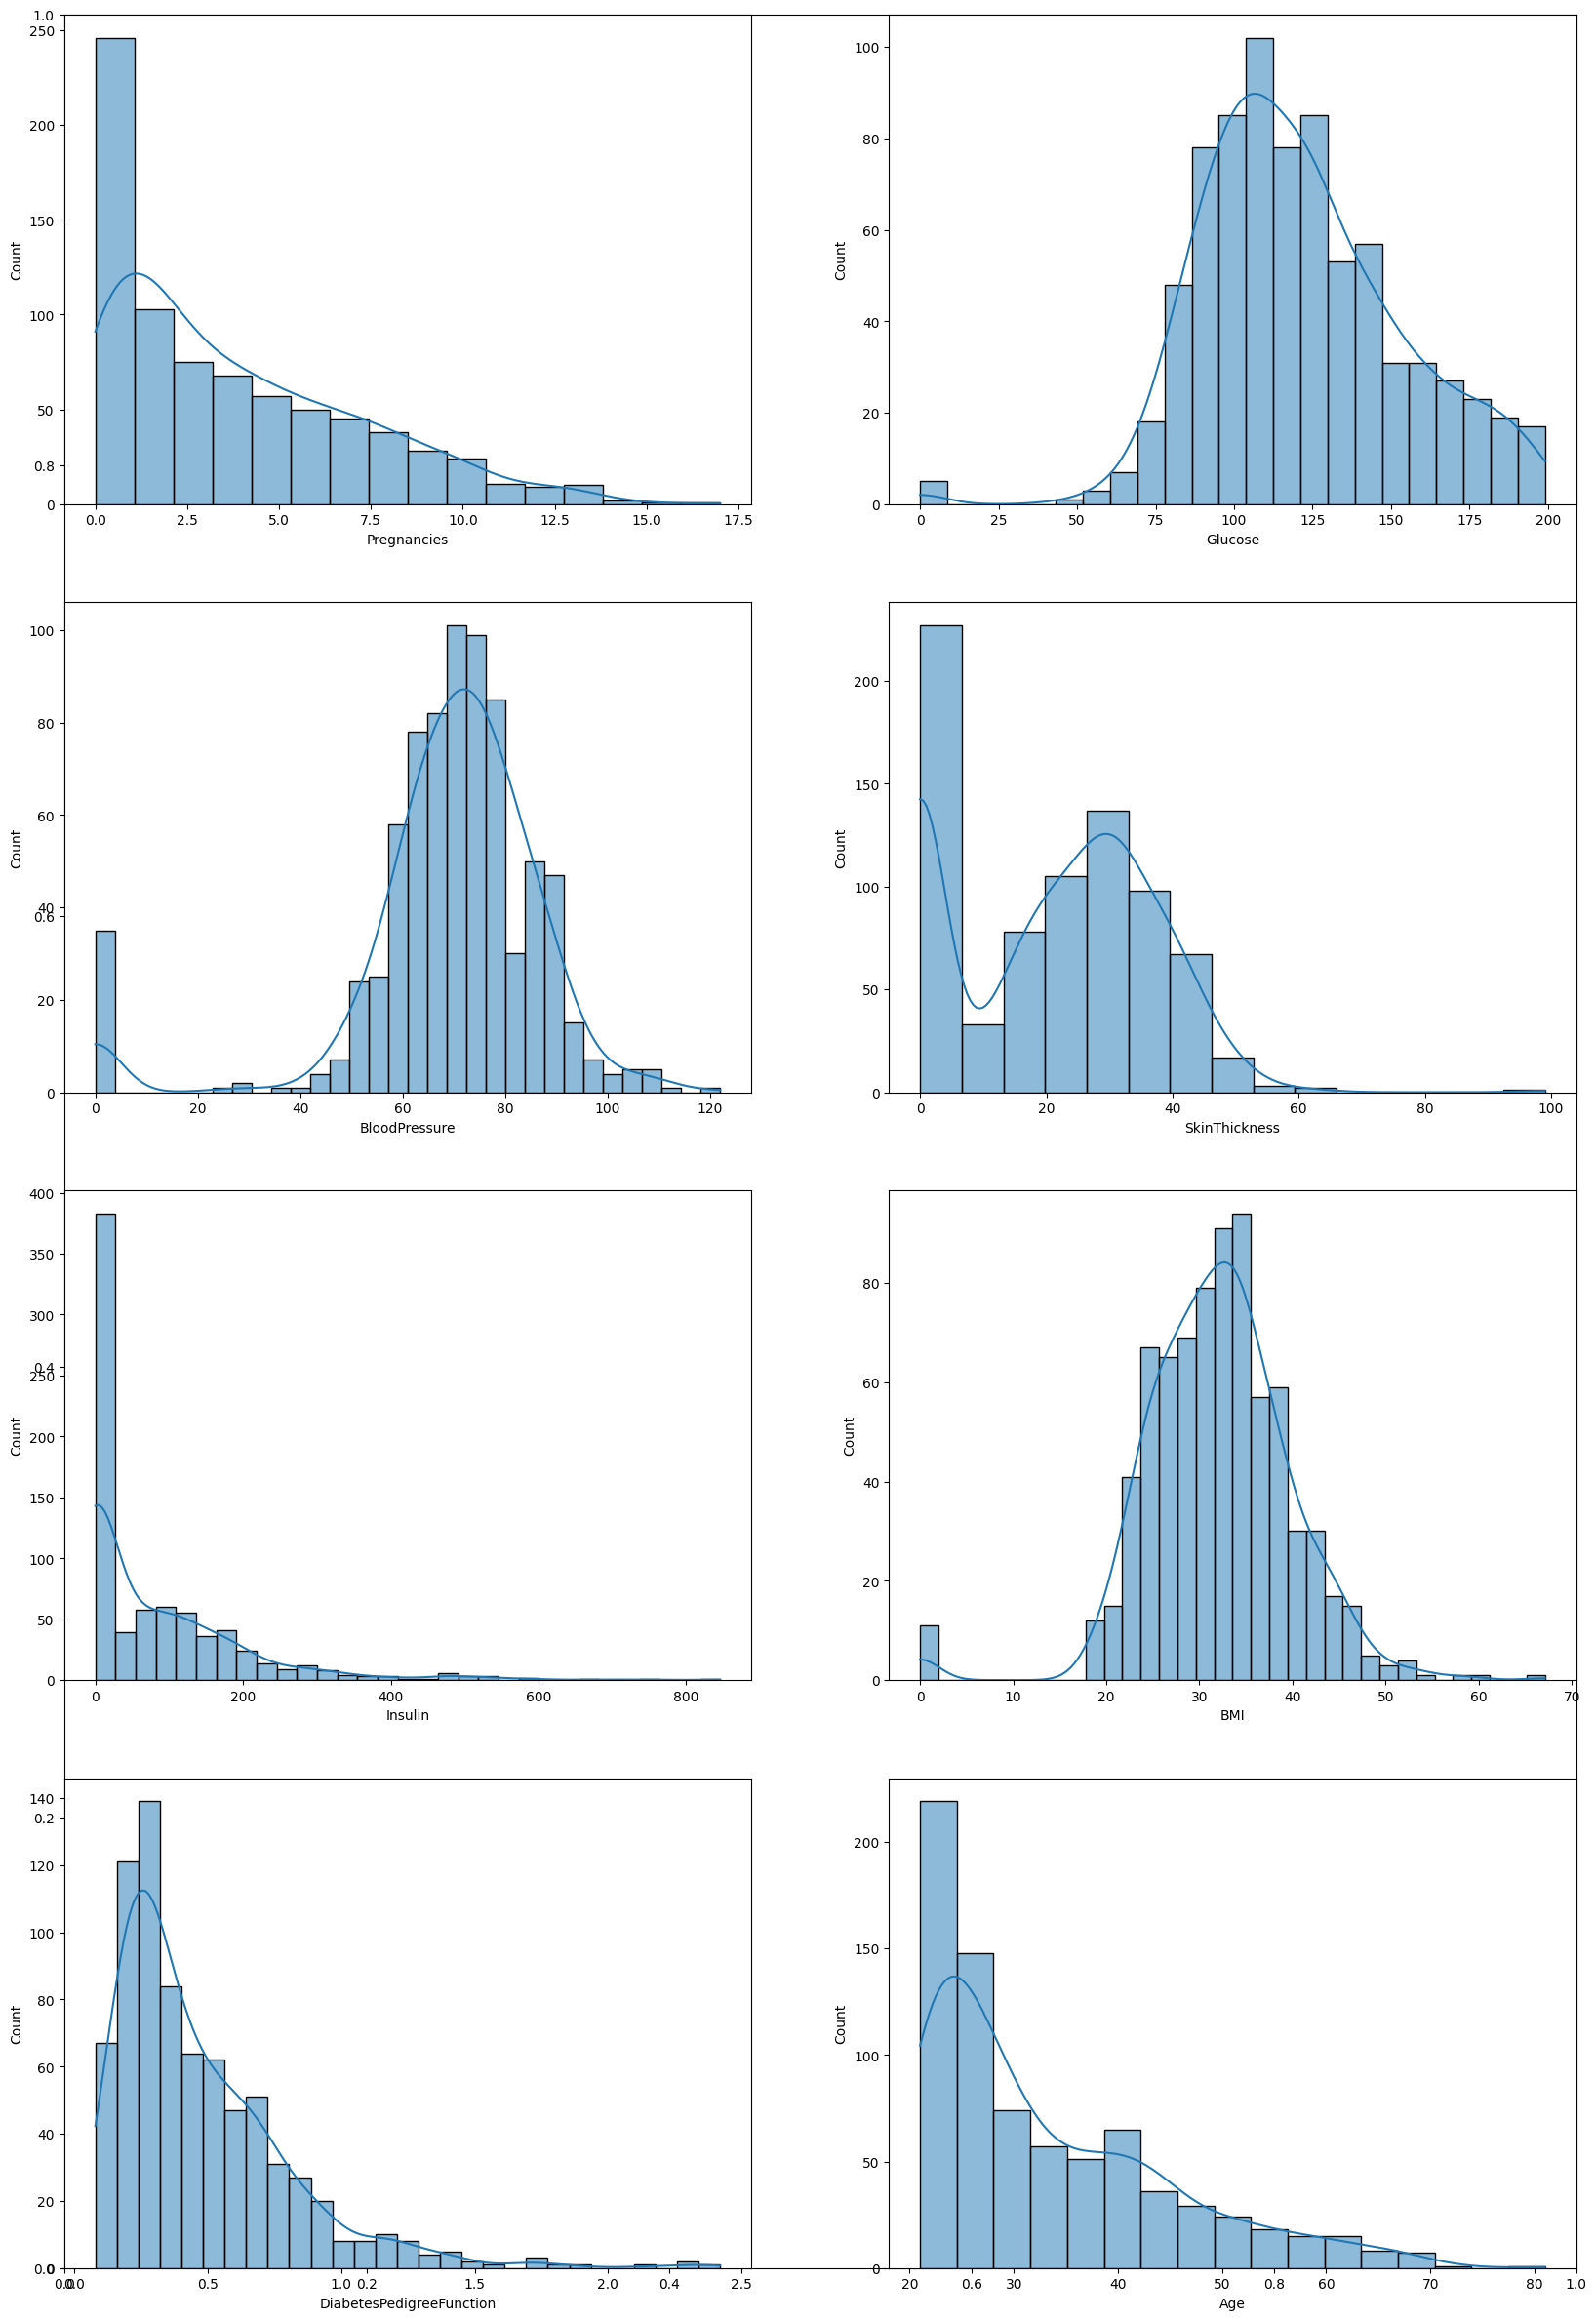

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.subplots(figsize = (20, 30))

for i, col in enumerate(features) :
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=data[col], kde=True)
plt.show()

- **Analyse :**

<br>

| Variable                  | Distribution          | Présence de 0	    | Remarque                                  |
| ------------------------- | --------------------- | ----------------- | ----------------------------------------- |
| Pregnancies               | Asymétrique droite    | Non               | Beaucoup de femmes ont peu de grossesses  |
| Glucose                   | Quasi normale         | Oui               | 0 = valeur manquante probable             |
| BloodPressure             | Quasi normale         | Oui               | 0 = valeur impossible                     |
| SkinThickness             | Très asymétrique      | Oui               | 0 = manquant                              |
| Insulin                   | Très asymétrique      | Oui               | Données très dispersées                   |
| BMI                       | Normale               | Oui               | Quelques 0 à corriger                     |
| DiabetesPedigreeFunction  | Asymétrique droite    | Non               | Valeurs élevées rares                     |
| Age                       | Asymétrique droite    | Non               | Plus de jeunes que de vieux               |

<br>

##### **4.3. Détection des Valeurs Aberrantes avec Boxplots :**

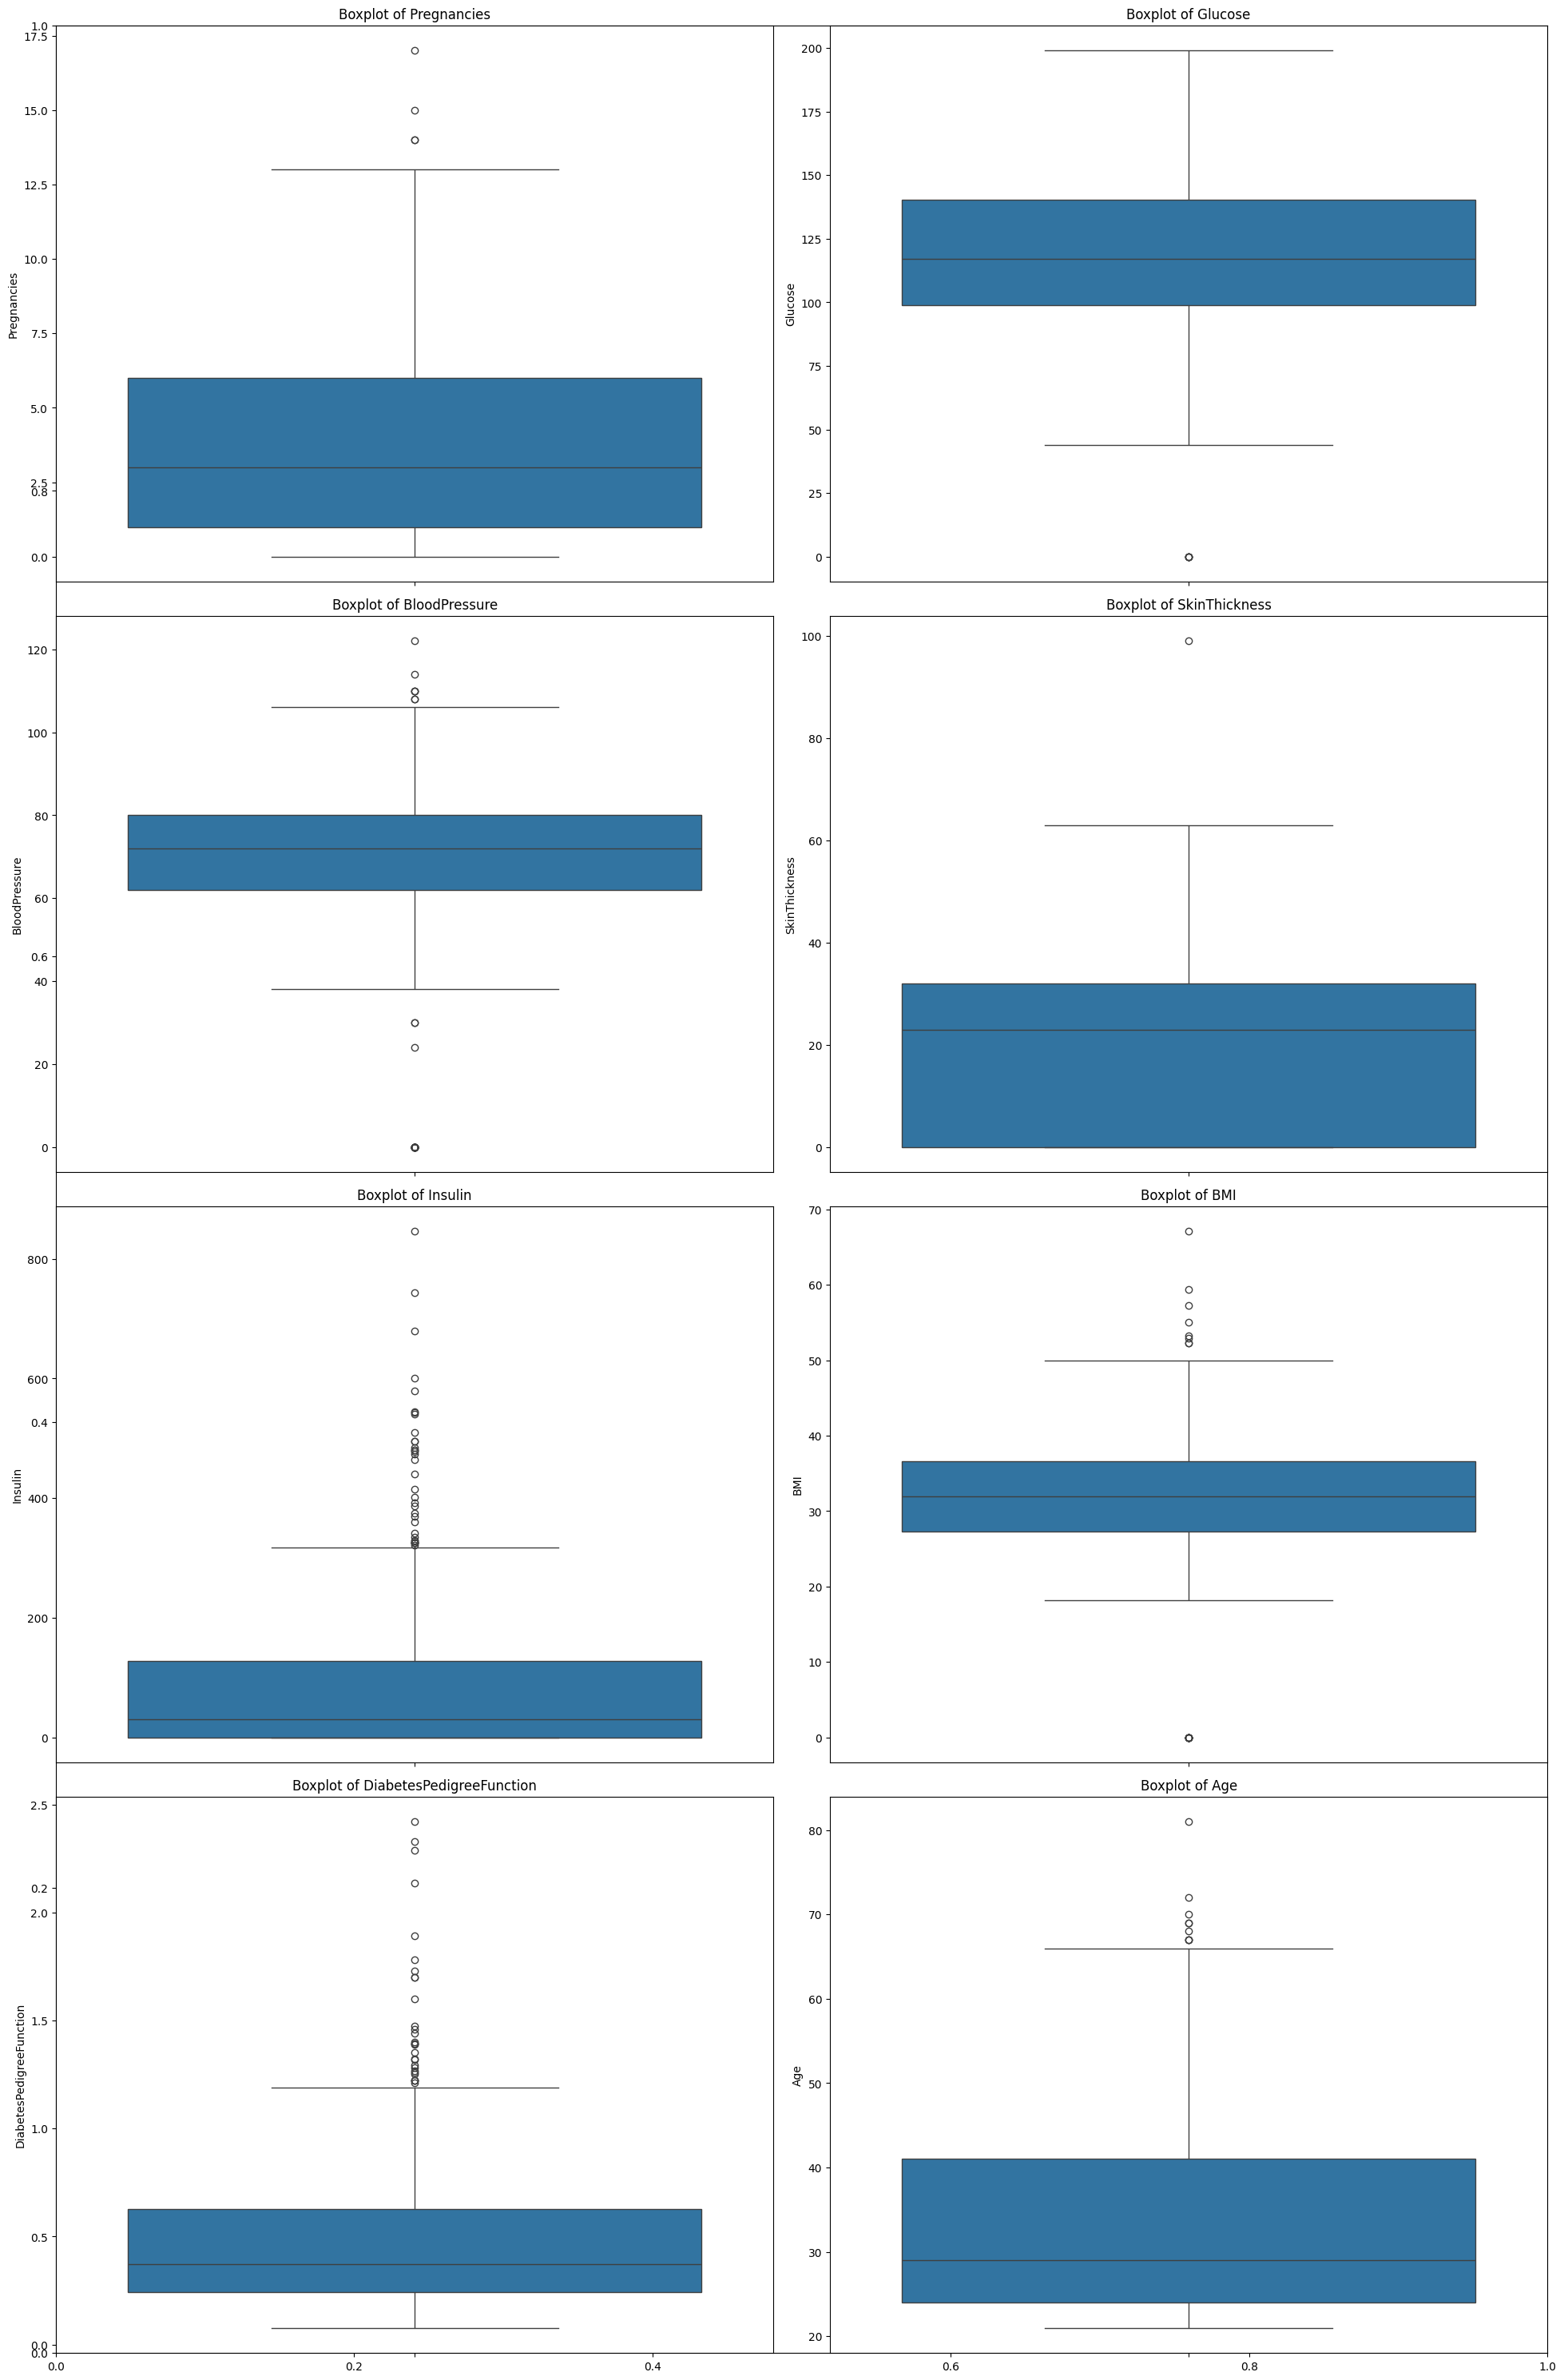

In [21]:
plt.subplots(figsize = (20, 30))

for i, col in enumerate(features) :
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

- **Analyse :**

<br>

| Variable                  | Présence d’outliers   | Valeurs aberrantes (0)    |
| ------------------------- | --------------------- | ------------------------- |
| Pregnancies               | Oui                   | Non                       |	
| Glucose                   | Oui                   | Oui                       |	
| BloodPressure             | Oui                   | Oui                       |	
| SkinThickness             | Oui                   | Oui                       |	
| Insulin                   | Oui (nombreux)        | Oui                       |	
| BMI                       | Oui                   | Oui                       |	
| DiabetesPedigreeFunction  | Oui (nombreux)        | Non                       |	
| Age                       | Oui                   | Non                       |	

<br>

##### **4.4. Relations croisées entre variables avec Pairplot :**

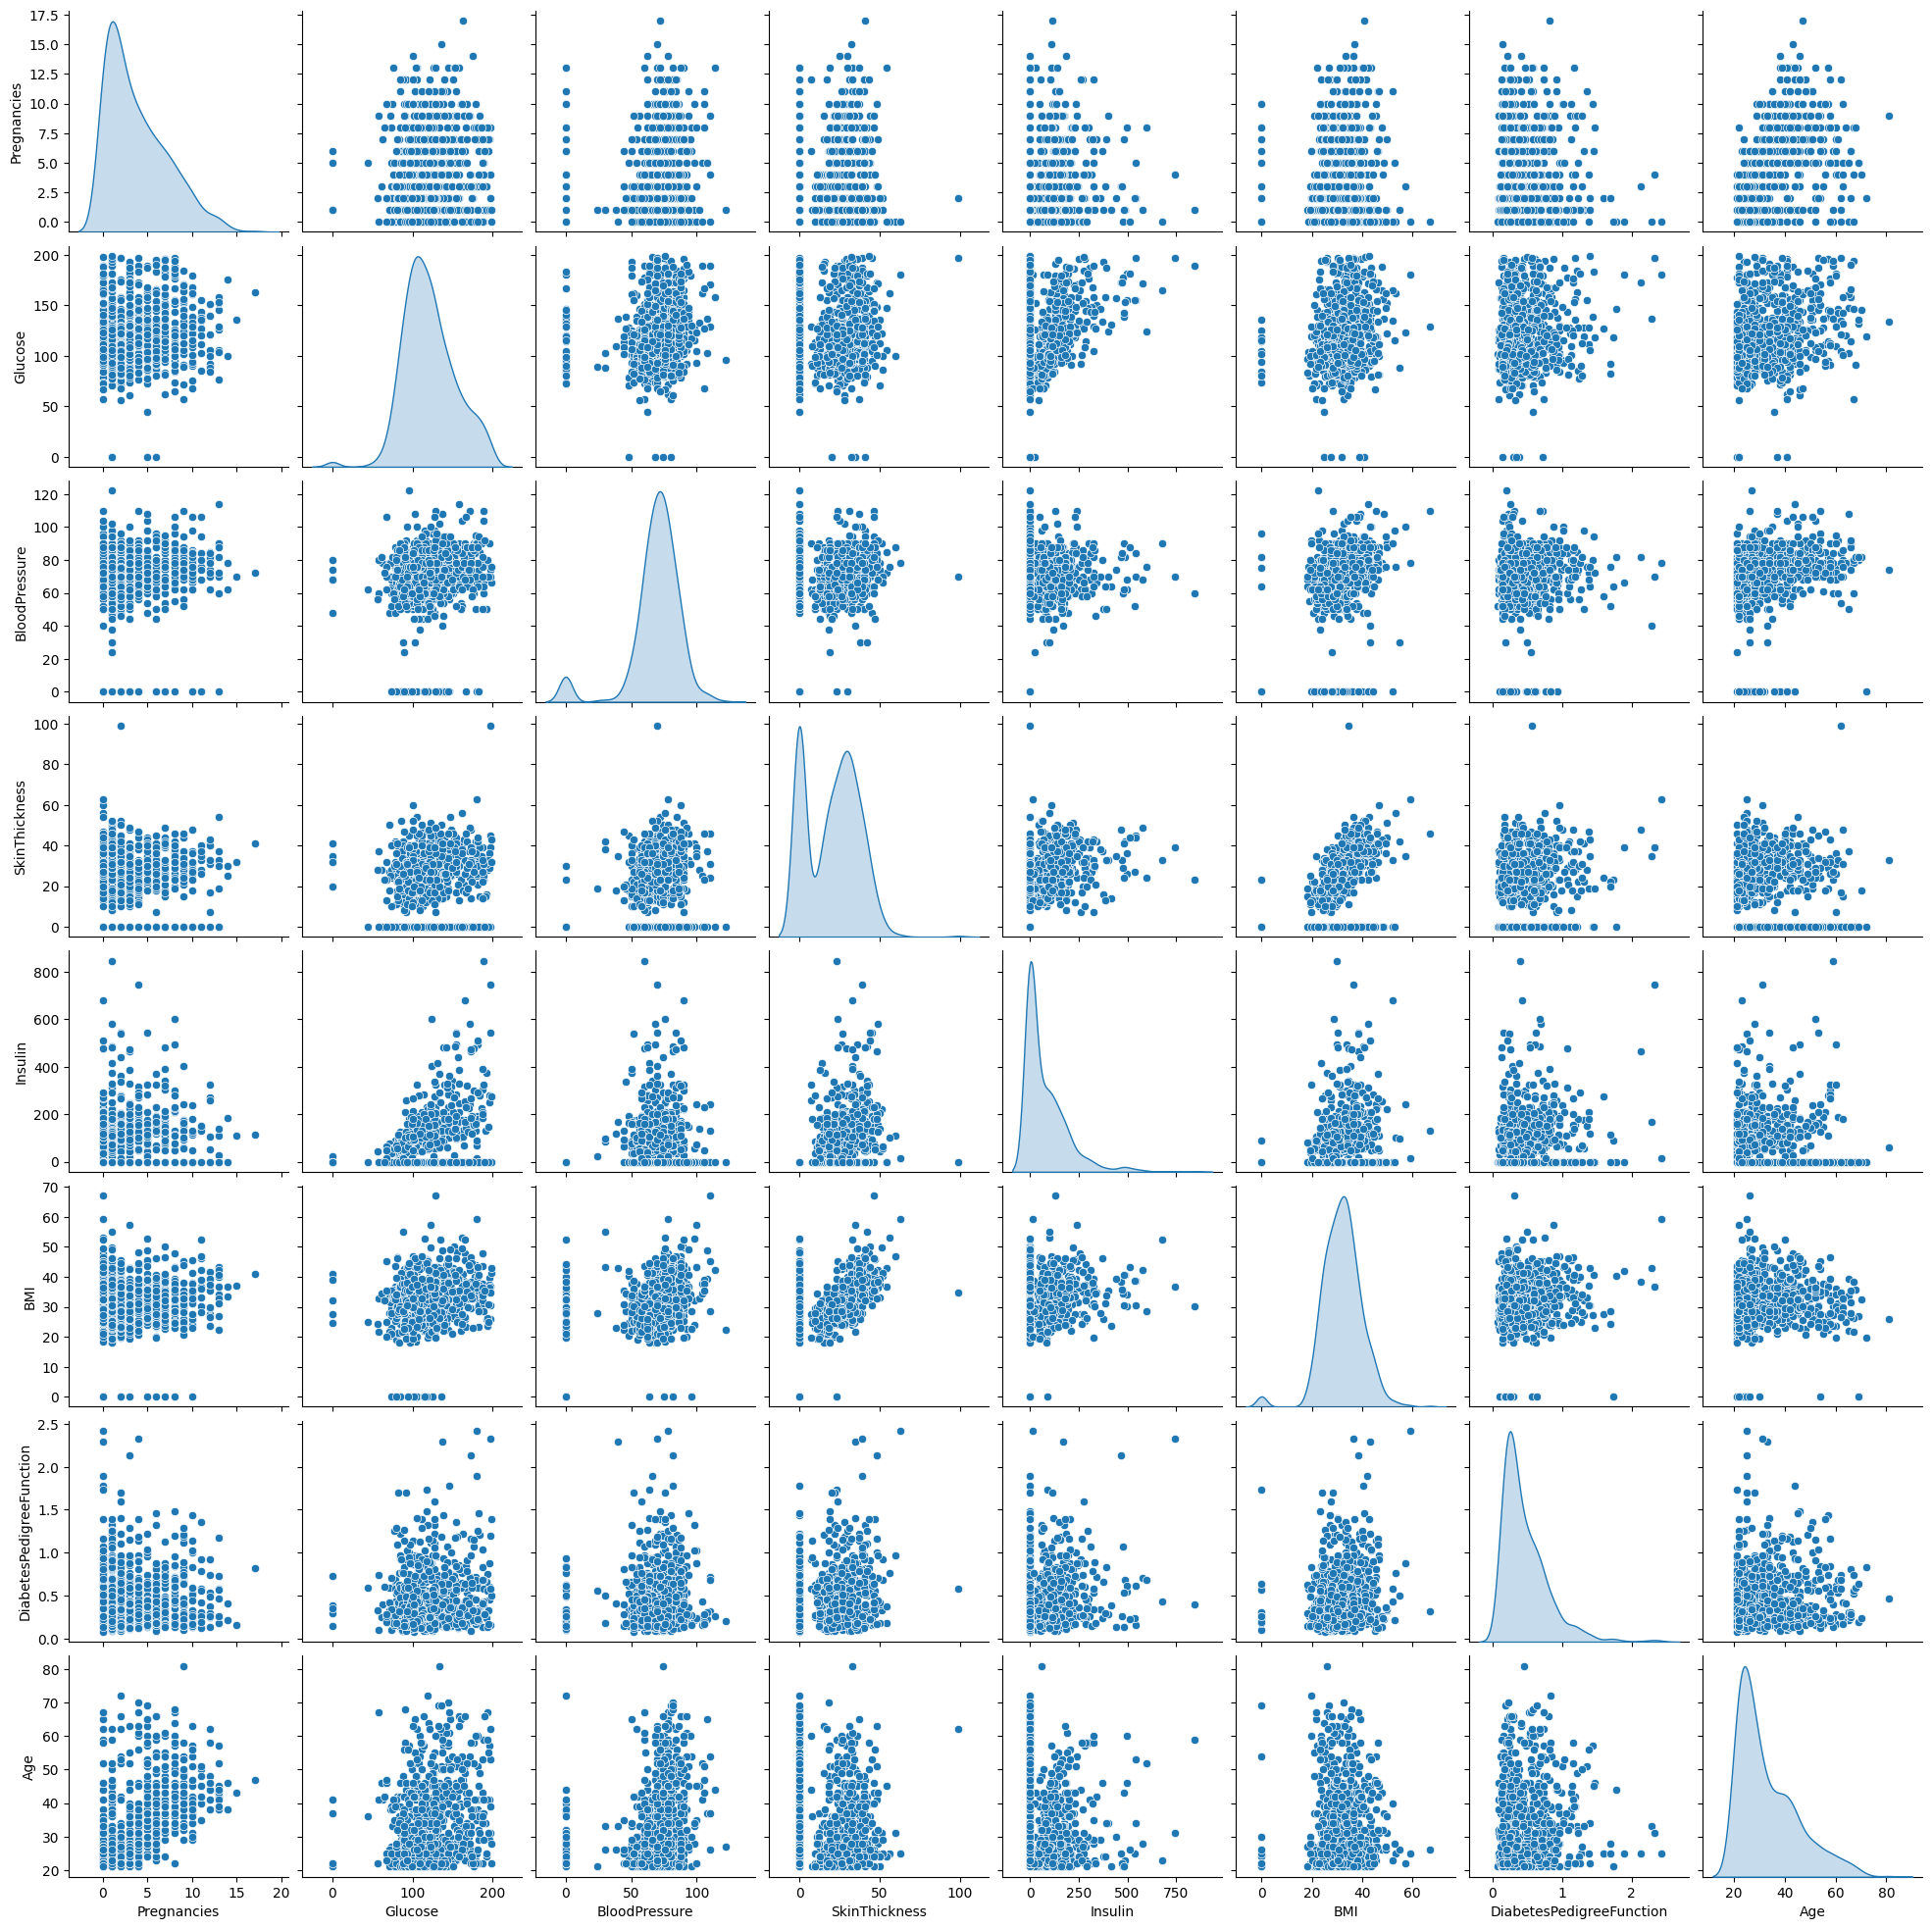

In [24]:
sns.pairplot(
    data,
    vars=features,
    diag_kind="kde"
)
plt.show()

- **Corrélations apparentes :**

    - Glucose semble positivement corrélé avec ``Insulin`` (points alignés en diagonale ascendante).

    - ``BMI`` et ``SkinThickness`` montrent une certaine corrélation positive.

    - Le nombre de grossesses n'a pas de corrélation évidente très forte avec les autres variables.

    - ``BloodPressure`` semble peu corrélé avec les autres variables.

<br>

##### **Heatmap de corrélation :**

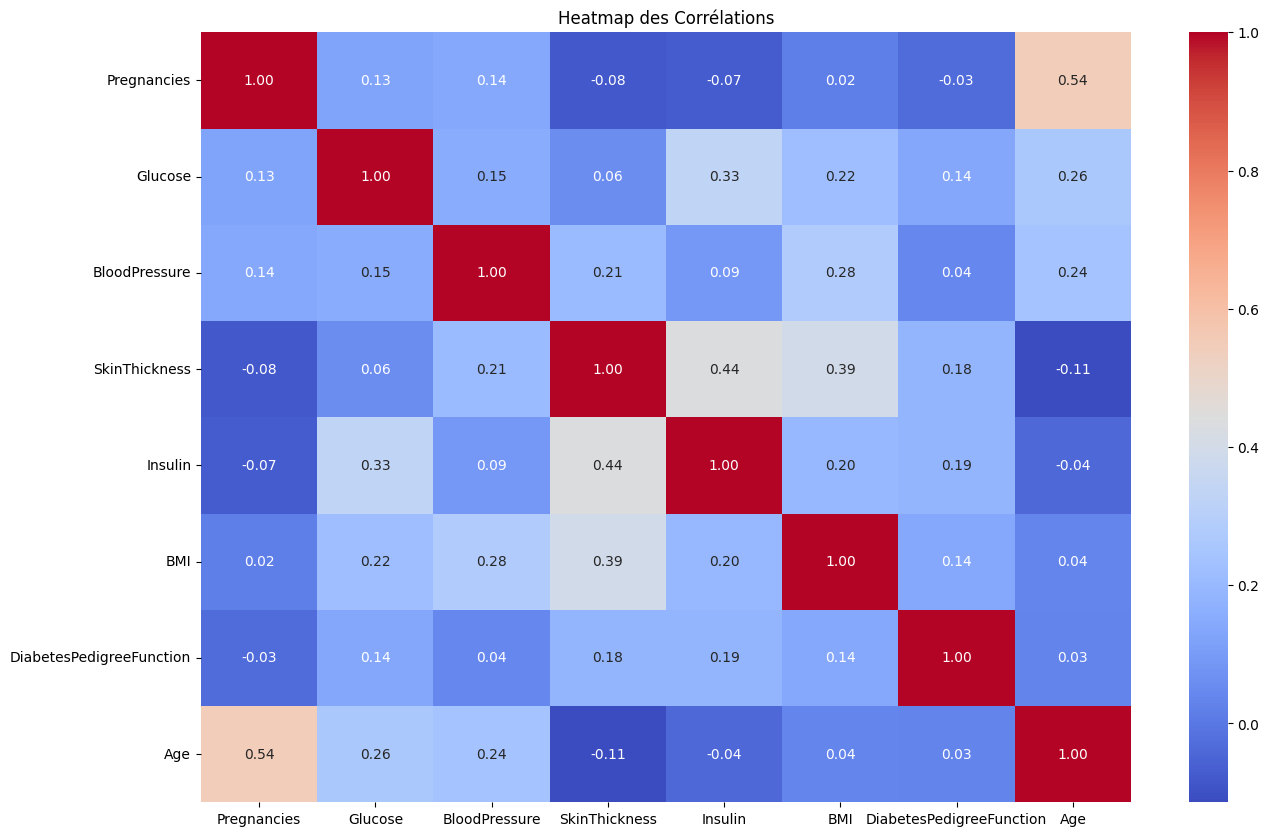

In [29]:
data_copy = data[features]

corr = data_copy.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des Corrélations")
plt.show()

- **Analyse :**

    - La corrélation la plus élevée est entre ``Pregnancies`` et ``Age``, avec un coefficient de 0.54, ce qui indique que le nombre de grossesses tend à augmenter avec l'âge.

    - ``Insulin`` est modérément corrélé avec ``SkinThickness`` (0.44) et ``Glucose`` (0.33), ce qui est cohérent avec l'effet métabolique lié au diabète.

    - ``SkinThickness`` et ``BMI`` affichent aussi une corrélation notable de 0.39, reflétant que l'épaisseur de la peau est liée à l'indice de masse corporelle.

    - ``BloodPressure`` montre des corrélations faibles à modérées (environ 0.1 à 0.28) avec diverses variables, notamment Glucose, ``SkinThickness`` et ``BMI``.

    - ``DiabetesPedigreeFunction`` a une faible corrélation avec toutes les variables (environ 0.03 à 0.19), indiquant une indépendance relative.

    - Certaines corrélations négatives, notamment entre ``Age`` et ``SkinThickness`` (-0.11), sont faibles.